In [2]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#### Do directors have an impact on success(nbox)?
#### Do actors have an impact on success(nbox)?

In [3]:
wikidata = pd.read_json('movies/data/wikidata-movies2.json.gz', orient='records', lines=True)
actors = pd.read_json('movies/data/actors.json.gz', orient='records', lines=True)
directors = pd.read_json('movies/data/directors.json.gz', orient='records', lines=True)

In [4]:
wikidata = wikidata[pd.notnull(wikidata['nbox'])]
#df = df[pd.notnull(df['made_profit'])]

In [5]:
# explode wikidata director
wikidata_d_stack = wikidata['director'].apply(pd.Series).stack().reset_index(level=1, drop=True).to_frame()
wikidata_d_stack.columns = ['wikidata_id']
# explode wikidata actors
wikidata_a_stack = wikidata['cast_member'].apply(pd.Series).stack().reset_index(level=1, drop=True).to_frame()
wikidata_a_stack.columns = ['wikidata_id']

In [6]:
wikidata_d = wikidata_d_stack.reset_index().merge(directors, how="left", on="wikidata_id").set_index('index')
wikidata_a = wikidata_a_stack.reset_index().merge(actors, how="left", on="wikidata_id").set_index('index')

In [7]:
wikidata_d = pd.merge(wikidata_d, wikidata, left_index=True, right_index=True).reset_index()
wikidata_a = pd.merge(wikidata_a, wikidata, left_index=True, right_index=True).reset_index()
#df_genre = pd.merge(df_genre, df, left_index=True, right_index=True).reset_index()

In [8]:
group_d = wikidata_d.groupby(by='director_label')['nbox'].mean().values
group_a = wikidata_a.groupby(by='actor_label')['nbox'].mean().values

1.8214146528345319e-94

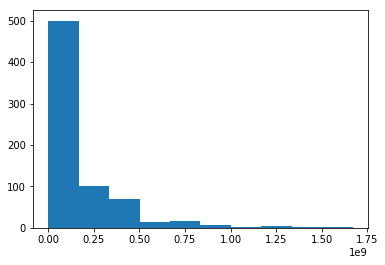

In [9]:
group_d_squared = (group_d ** 2)
plt.hist(group_d)
stats.normaltest(group_d).pvalue

0.0

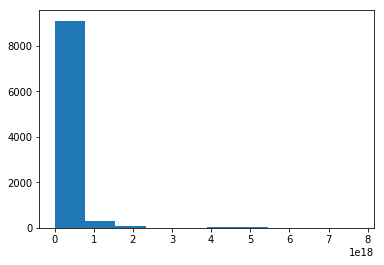

In [111]:
group_a_squared = (group_a ** 2)
plt.hist(group_a_squared)
stats.normaltest(group_a_squared).pvalue

In [11]:
print(stats.mannwhitneyu(group_a, group_d).pvalue)

1.3271165353901276e-18


#### AVONA test on directors and nbox

In [118]:
groups = wikidata_d.groupby('director_label').groups

In [116]:
# get n box values for each actor
array = []
for value in groups.values():
    array.append(wikidata_d['nbox'].iloc[value])

Int64Index([246], dtype='int64')
Int64Index([1132], dtype='int64')
Int64Index([792], dtype='int64')
Int64Index([461], dtype='int64')
Int64Index([779], dtype='int64')
Int64Index([164], dtype='int64')
Int64Index([45], dtype='int64')
Int64Index([899], dtype='int64')
Int64Index([115], dtype='int64')
Int64Index([1049], dtype='int64')
Int64Index([734], dtype='int64')
Int64Index([642], dtype='int64')
Int64Index([852], dtype='int64')
Int64Index([775], dtype='int64')
Int64Index([7], dtype='int64')
Int64Index([376], dtype='int64')
Int64Index([704], dtype='int64')
Int64Index([203, 622], dtype='int64')
Int64Index([40, 392, 549, 760], dtype='int64')
Int64Index([0], dtype='int64')
Int64Index([543], dtype='int64')
Int64Index([741], dtype='int64')
Int64Index([8, 36], dtype='int64')
Int64Index([565, 930], dtype='int64')
Int64Index([232], dtype='int64')
Int64Index([683], dtype='int64')
Int64Index([1, 200], dtype='int64')
Int64Index([550], dtype='int64')
Int64Index([947], dtype='int64')
Int64Index([700],

Int64Index([49, 911], dtype='int64')
Int64Index([693, 770], dtype='int64')
Int64Index([1096], dtype='int64')
Int64Index([967, 1071], dtype='int64')
Int64Index([446, 686], dtype='int64')
Int64Index([587], dtype='int64')
Int64Index([1128], dtype='int64')
Int64Index([113], dtype='int64')
Int64Index([423], dtype='int64')
Int64Index([166], dtype='int64')
Int64Index([410], dtype='int64')
Int64Index([411], dtype='int64')
Int64Index([1037], dtype='int64')
Int64Index([1095], dtype='int64')
Int64Index([227], dtype='int64')
Int64Index([679], dtype='int64')
Int64Index([474], dtype='int64')
Int64Index([506], dtype='int64')
Int64Index([542], dtype='int64')
Int64Index([110, 222, 229, 307, 449, 472, 632, 664, 982, 1099, 1109, 1125], dtype='int64')
Int64Index([570], dtype='int64')
Int64Index([1097], dtype='int64')
Int64Index([165, 202, 217], dtype='int64')
Int64Index([459], dtype='int64')
Int64Index([698], dtype='int64')
Int64Index([1154], dtype='int64')
Int64Index([274, 789], dtype='int64')
Int64Index

In [124]:
anova_d = stats.f_oneway(*array)

In [125]:
anova_d.pvalue
# 7.94 e-05 => there is a difference in means of the actors

0.33404849215546156

#### AVONA with actors

In [121]:
groups_actor = wikidata_a.groupby('actor_label').groups

In [122]:
# get n box values for each actor
array = []
for value in groups.values():
    array.append(wikidata_a['nbox'].iloc[value])

In [126]:
anova_d = stats.f_oneway(*array)

In [128]:
anova_d.pvalue
# 0.33 => cannot conclude

0.33404849215546156